In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import yaml

from apex_ocr.config import DATABASE_YML_FILE
from apex_ocr.database.api import ApexDatabaseApi
from apex_ocr.database.models import MatchResult, Player, PlayerMatchResult

In [2]:
with open(DATABASE_YML_FILE) as db_file:
    db_config = yaml.load(db_file, Loader=yaml.FullLoader)

dialect = db_config["dialect"]
username = db_config["username"]
password = db_config["password"]
hostname = db_config["hostname"]
port = db_config["port"]
database_name = db_config["database_name"]

db_conn_str = f"{dialect}://{username}:{password}@{hostname}:{port}/{database_name}"

db_conn = ApexDatabaseApi(db_conn_str)

In [3]:
match_results = db_conn.session.query(MatchResult).all()

In [4]:
ccc_match_results = []
red_ninja_match_results = []
redlezar_solo_results = []
prodigal_solo_results = []
fourransom_solo_results = []

for match_result in match_results:
    player_names = set([pmr.player.name for pmr in match_result.player_match_results])

    if set(["redlezar", "4ransom", "prodigalninja"]) == player_names:
        ccc_match_results.append(match_result)
    elif set(["redlezar", "prodigalninja"]).issubset(player_names):
        red_ninja_match_results.append(match_result)
    elif "redlezar" in player_names:
        redlezar_solo_results.append(match_result)
    elif "prodigalninja" in player_names:
        prodigal_solo_results.append(match_result)
    elif "4ransom" in player_names:
        fourransom_solo_results.append(match_result)

In [ ]:
ignore_cols = [
    "id",
    "match_id",
    "datetime",
    "match_type",
    "result",
    "hash",
    "player_id",
    "clan_id",
    "player_name",
    "legend",
]

In [7]:
full_match_result = pd.DataFrame()

for match_result in ccc_match_results:
    for pmr in match_result.player_match_results:
        full_match_result = pd.concat(
            [full_match_result, pd.DataFrame(pmr.to_dict(), index=[0])]
        )

full_match_result.drop(
    columns=[
        "id",
        "match_id",
        "datetime",
        "match_type",
        "result",
        "hash",
        "player_id",
        "clan_id",
        "player_name",
        "legend",
    ]
).mean()

place              9.479167
kills              0.666667
assists            0.638889
knockdowns         0.854167
damage           295.631944
survival_time    493.784722
revives            0.402778
respawns           0.041667
dtype: float64

In [56]:
full_match_result = pd.DataFrame()

for match_result in red_ninja_match_results:
    for pmr in match_result.player_match_results:
        full_match_result = pd.concat([full_match_result, pd.DataFrame(pmr.to_dict(), index=[0])])

full_match_result.drop(columns=["datetime", "match_id", "match_type", "player_name", "legend"]).mean()


place             10.734300
kills              0.619968
assists            0.493827
knockdowns         0.887279
damage           305.919485
survival_time    439.768116
revives            0.310789
respawns           0.027375
dtype: float64

In [57]:
full_match_result = pd.DataFrame()

for match_result in redlezar_solo_results:
    for pmr in match_result.player_match_results:
        full_match_result = pd.concat([full_match_result, pd.DataFrame(pmr.to_dict(), index=[0])])

full_match_result.drop(columns=["datetime", "match_id", "match_type", "player_name", "legend"]).mean()


place             11.459459
kills              0.657658
assists            0.522523
knockdowns         0.801802
damage           288.486486
survival_time    458.900901
revives            0.360360
respawns           0.018018
dtype: float64

In [58]:
full_match_result = pd.DataFrame()

for match_result in prodigal_solo_results:
    for pmr in match_result.player_match_results:
        full_match_result = pd.concat([full_match_result, pd.DataFrame(pmr.to_dict(), index=[0])])

full_match_result.drop(columns=["datetime", "match_id", "match_type", "player_name", "legend"]).mean()


place             11.750000
kills              0.583333
assists            0.166667
knockdowns         0.666667
damage           240.000000
survival_time    259.333333
revives            0.250000
respawns           0.166667
dtype: float64

In [59]:
prodigalninja = db_conn.session.query(Player).filter_by(name="prodigalninja").first()
redlezar = db_conn.session.query(Player).filter_by(name="redlezar").first()
fransom = db_conn.session.query(Player).filter_by(name="4ransom").first()


In [4]:
results_df = pd.DataFrame()

for match_result in prodigalninja.match_results:
    results_df = pd.concat(
        [results_df, pd.DataFrame(match_result.to_dict(), index=[0])]
    )

for match_result in redlezar.match_results:
    results_df = pd.concat(
        [results_df, pd.DataFrame(match_result.to_dict(), index=[0])]
    )

for match_result in fransom.match_results:
    results_df = pd.concat(
        [results_df, pd.DataFrame(match_result.to_dict(), index=[0])]
    )

# Filter out bad data
results_df = results_df[results_df["place"] <= 20]

results_df.head()

,datetime,match_id,match_type,place,player_name,legend,kills,assists,knockdowns,damage,survival_time,revives,respawns
0,2021-12-11 22:14:04.098594-05:00,1,MatchType.BATTLE_ROYALE,2,prodigalninja,None,4,2,4,604,601,0,0
0,2021-12-11 22:25:53.023680-05:00,2,MatchType.BATTLE_ROYALE,2,prodigalninja,None,3,0,3,859,533,0,0
0,2021-12-12 00:00:07.882383-05:00,3,MatchType.BATTLE_ROYALE,2,prodigalninja,None,3,0,3,782,646,0,0
0,2022-05-02 22:39:03.893154-04:00,4,MatchType.BATTLE_ROYALE,3,prodigalninja,None,1,0,1,206,750,0,0
0,2022-05-10 23:12:27.289623-04:00,5,MatchType.BATTLE_ROYALE,8,prodigalninja,None,0,0,0,41,404,0,0


In [66]:
player_match_results = pd.DataFrame()
for pmr in db_conn.session.query(PlayerMatchResult).all():
    player_match_results = pd.concat(
        [player_match_results, pd.DataFrame(pmr.to_dict(), index=[0])]
    )
player_match_results


,datetime,match_id,match_type,place,player_name,legend,kills,assists,knockdowns,damage,survival_time,revives,respawns
0,2021-12-11 22:14:04.098594-05:00,1,MatchType.BATTLE_ROYALE,2,4ransom,None,2,3,2,883,620,0,0
0,2021-12-11 22:14:04.098594-05:00,1,MatchType.BATTLE_ROYALE,2,prodigalninja,None,4,2,4,604,601,0,0
0,2021-12-11 22:14:04.098594-05:00,1,MatchType.BATTLE_ROYALE,2,redlezar,None,3,2,3,1326,599,0,0
0,2021-12-11 22:25:53.023680-05:00,2,MatchType.BATTLE_ROYALE,2,redlezar,None,2,0,2,259,589,0,0
0,2021-12-11 22:25:53.023680-05:00,2,MatchType.BATTLE_ROYALE,2,prodigalninja,None,3,0,3,859,533,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2023-05-10 06:52:37.784424-04:00,720,MatchType.BATTLE_ROYALE,7,prodigalninja,None,0,0,0,85,534,0,0
0,2023-05-10 06:52:37.784424-04:00,720,MatchType.BATTLE_ROYALE,7,johnthescout,None,0,0,0,35,534,0,0
0,2023-05-10 07:09:24.859442-04:00,721,MatchType.BATTLE_ROYALE,6,redlezar,None,0,0,0,162,339,0,0
0,2023-05-10 07:09:24.859442-04:00,721,MatchType.BATTLE_ROYALE,6,prodigalninja,None,0,0,0,43,341,0,0


In [68]:
player_match_results.player_name.value_counts()[:10]

player_name
redlezar           706
prodigalninja      673
4ransom             50
lightningquick3     50
prodigaininja       37
unknown              4
loukey               3
riverbank            3
keropa               3
hankthetank          2
Name: count, dtype: int64

In [17]:
results_df[
    [
        "place",
        "player_name",
        "kills",
        "assists",
        "knockdowns",
        "damage",
        "survival_time",
        "revives",
        "respawns",
    ]
].groupby("player_name").agg(["mean"])

,place,kills,assists,knockdowns,damage,survival_time,revives,respawns
,mean,mean,mean,mean,mean,mean,mean,mean
player_name,,,,,,,,
4ransom,9.346939,0.571429,0.612245,0.693878,252.734694,505.755102,0.714286,0.000000
prodigalninja,10.529851,0.686567,0.471642,0.992537,319.005970,449.249254,0.332836,0.038806
redlezar,10.460770,0.446505,0.603424,0.653352,261.012839,452.045649,0.432240,0.021398


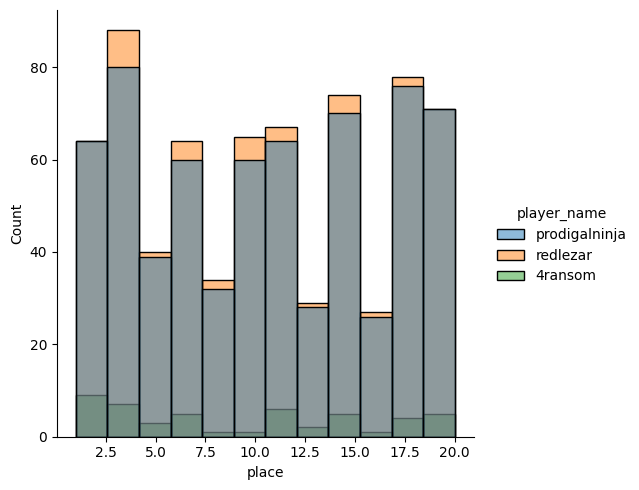

In [38]:
sns.displot(data=results_df, hue="player_name", x="place", kind="hist")

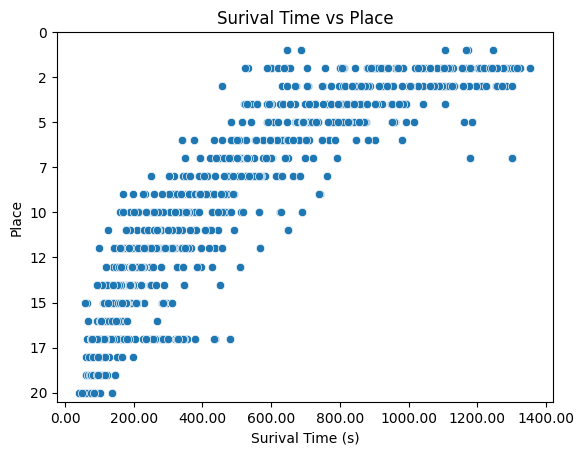

In [41]:
plt.figure()
ax = sns.scatterplot(data=results_df, x="survival_time", y="place")
ax.set_title("Surival Time vs Place")
ax.set_xlabel("Surival Time (s)")
ax.set_ylabel("Place")
ax.set_ylim(20.5, 0)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%2.2f"))

<Axes: xlabel='P2 Damage', ylabel='P2 Knocks'>

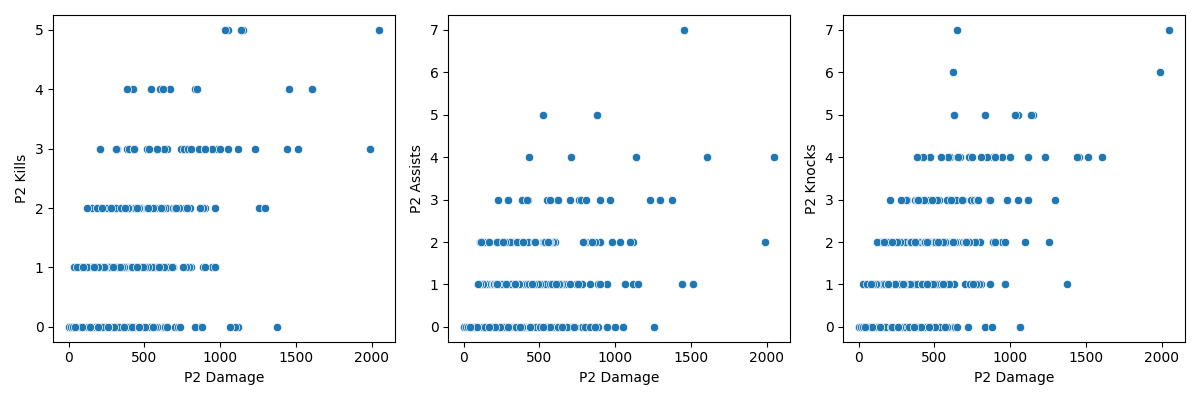

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.scatterplot(data=pn_stats, x="P2 Damage", y="P2 Kills", ax=axs[0])
sns.scatterplot(data=pn_stats, x="P2 Damage", y="P2 Assists", ax=axs[1])
sns.scatterplot(data=pn_stats, x="P2 Damage", y="P2 Knocks", ax=axs[2])

In [9]:
pn_place_rolling_data = pn_stats["Place"].rolling(7).mean().shift(-3)
pn_dmg_rolling_data = pn_stats["P2 Damage"].rolling(7).mean().shift(-3)
pn_kills_rolling_data = pn_stats["P2 Kills"].rolling(7).mean().shift(-3)

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True)
# sns.scatterplot(data=pn_stats, x=range(len(pn_stats)), y="Place")
sns.lineplot(data=pn_place_rolling_data, ax=axs[0])
axs[0].set_title("Place Rolling Average")

sns.lineplot(data=pn_dmg_rolling_data, ax=axs[1])
axs[1].set_title("Damage Rolling Average")

sns.lineplot(data=pn_kills_rolling_data, ax=axs[2])
axs[2].set_title("Kills Rolling Average")

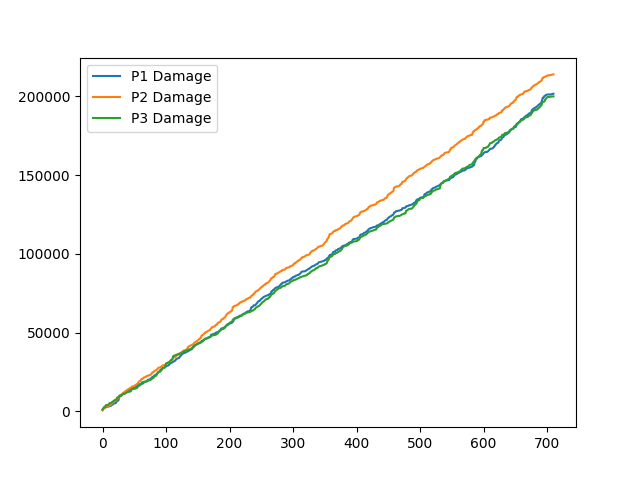

In [6]:
fig, ax = plt.subplots()

stat = "Damage"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()

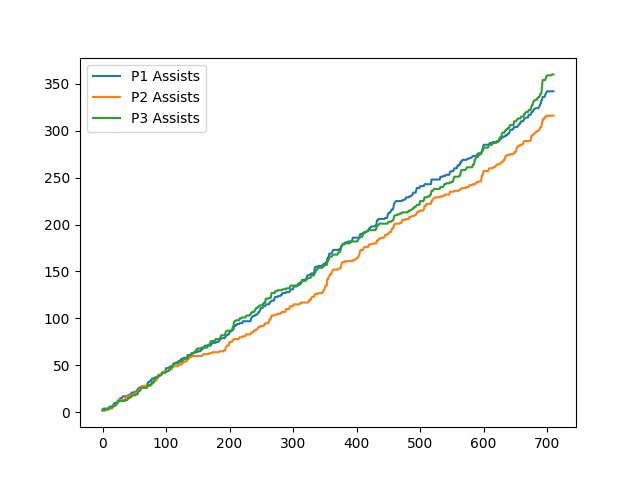

In [10]:
fig, ax = plt.subplots()

stat = "Assists"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()

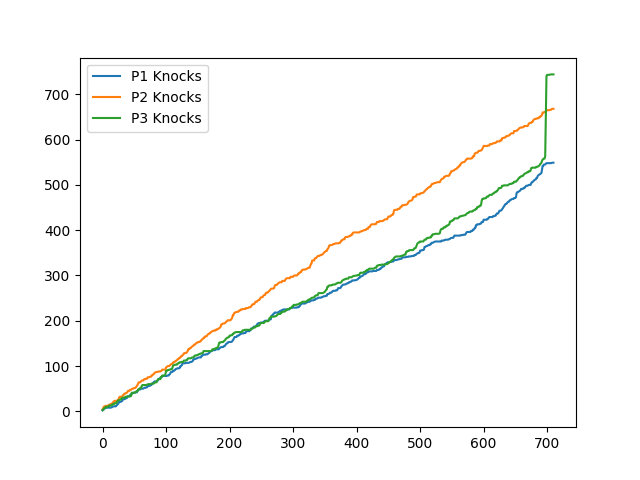

In [7]:
fig, ax = plt.subplots()

stat = "Knocks"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()

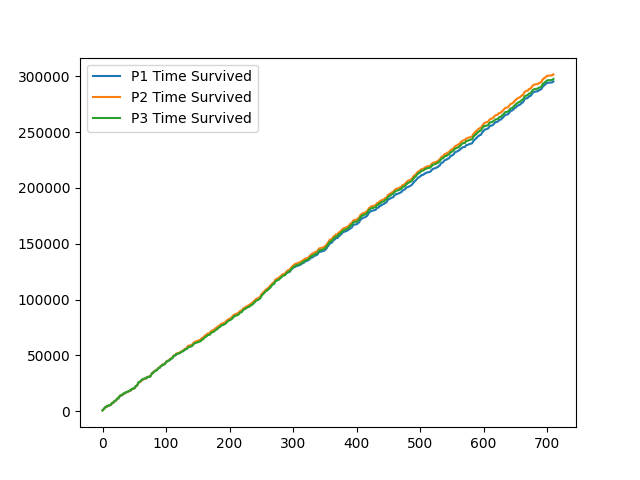

In [11]:
fig, ax = plt.subplots()

stat = "Time Survived"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()

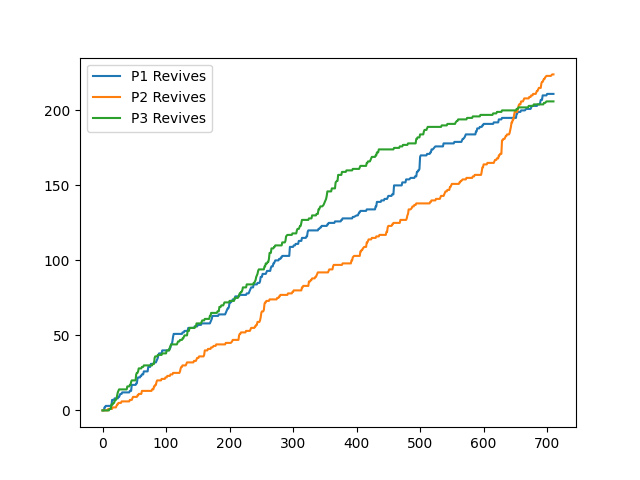

In [12]:
fig, ax = plt.subplots()

stat = "Revives"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()

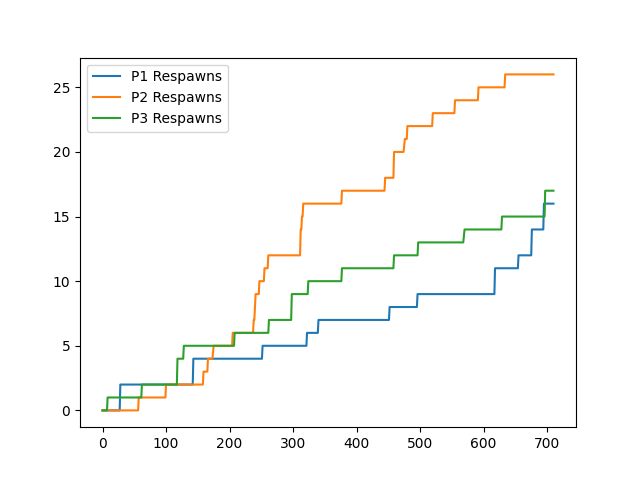

In [15]:
fig, ax = plt.subplots()

stat = "Respawns"

pn_stats[f"P1 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P2 {stat}"].cumsum().plot(ax=ax)
pn_stats[f"P3 {stat}"].cumsum().plot(ax=ax)
plt.legend()